<a href="https://colab.research.google.com/github/Parimala-15/student_dashboard/blob/main/Student_Dropout_Prediction_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Set path to the OULAD dataset in your Google Drive.

- List all .csv files in that folder.

- Load each CSV into a Pandas DataFrame and store in a dictionary.

- Print shape of each dataset to confirm successful loading.

- Preview studentInfo if it exists, else show a warning.

In [49]:
import pandas as pd
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"  # change this to your path


# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Load all CSV files into a dictionary of DataFrames
data = {}
for file in csv_files:
    name = file.replace(".csv", "")
    data[name] = pd.read_csv(os.path.join(data_path, file))
    print(f"{name}: {data[name].shape}")

# Example: preview the 'studentInfo' dataset
# Make sure 'studentInfo' is one of the CSV files in your folder
if 'studentInfo' in data:
    display(data['studentInfo'].head())
else:
    print("studentInfo.csv not found in the specified directory.")

assessments: (206, 6)
studentAssessment: (173912, 5)
courses: (22, 3)
studentRegistration: (32593, 5)
studentVle_0: (1500000, 7)
studentInfo: (32593, 12)
studentVle_1: (1500000, 7)
studentVle_2: (1500000, 7)
studentVle_3: (1500000, 7)
studentVle_4: (1500000, 7)
studentVle_5: (1500000, 7)
studentVle_6: (1500000, 7)
vle: (6364, 6)
studentVle_7: (155280, 7)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


- Iterates through each dataset in the data dictionary.

- Prints the dataset name and its shape (rows × columns).

- Displays column info including data types and null counts.

- Shows the first 3 rows of each dataset for a quick preview.

In [50]:
for name, df in data.items():
    print(f"\n📄 {name.upper()} – Shape: {df.shape}")
    print(df.info())
    print(df.head(3))



📄 ASSESSMENTS – Shape: (206, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0

📄 STUDENTASSESSMENT – Shape: (173912, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 e

# **📌 Phase 1 – Data Ingestion & Merging**

# Step 1 – Identify the Key Tables

From OULAD, the 3 main student-related files are:

studentInfo.csv → student demographics & final result

studentAssessment.csv → student assessment scores

studentVle.csv → student activity in the Virtual Learning Environment (clicks)

All of them share the id_student column, which allows us to merge them.

# Step 2 – Load the studentInfo and studentAssessment

In [51]:
# Load main student and assessment data
student_info = pd.read_csv(f"{data_path}/studentInfo.csv")
student_assessment = pd.read_csv(f"{data_path}/studentAssessment.csv")

print("studentInfo shape:", student_info.shape)
print("studentAssessment shape:", student_assessment.shape)


studentInfo shape: (32593, 12)
studentAssessment shape: (173912, 5)


# Step 3 – Combine All studentVle Files into One

We have 7 studentVle.csv files, it means our OULAD dataset is split by module/presentation instead of having one combined file.
That’s normal in some versions of OULAD where activity logs are stored separately for each course module.

What we’ll do:

Identify all studentVle CSVs in your dataset folder.

Read and combine them into a single student_vle DataFrame before merging.

In [52]:
# Find all studentVle CSV files in the folder
vle_files = [f for f in os.listdir(data_path) if "studentVle" in f and f.endswith(".csv")]
print("Found studentVle files:", vle_files)

# Read, keep only needed columns, and aggregate clicks
student_vle_list = []
for file in vle_files:
    temp_df = pd.read_csv(os.path.join(data_path, file), usecols=["id_student", "sum_click"])
    student_vle_list.append(temp_df)

# Combine all studentVle data
student_vle = pd.concat(student_vle_list, ignore_index=True)

# Aggregate total clicks per student
student_vle = student_vle.groupby("id_student", as_index=False)["sum_click"].sum()
print("Aggregated studentVle shape:", student_vle.shape)


Found studentVle files: ['studentVle_0.csv', 'studentVle_1.csv', 'studentVle_2.csv', 'studentVle_3.csv', 'studentVle_4.csv', 'studentVle_5.csv', 'studentVle_6.csv', 'studentVle_7.csv']
Aggregated studentVle shape: (26074, 2)


# Step  4– Merge All Student Data

In [53]:
# Merge studentInfo with aggregated clicks
merged_df = pd.merge(student_info, student_vle, on="id_student", how="left")

# Merge with studentAssessment
merged_df = pd.merge(merged_df, student_assessment, on="id_student", how="left")

print("Final merged_df shape:", merged_df.shape)
merged_df.head()



Final merged_df shape: (213166, 17)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1752.0,18.0,0.0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1753.0,53.0,0.0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1754.0,115.0,0.0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1755.0,164.0,0.0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1756.0,212.0,0.0,82.0


# Step 5 – Save the Merged Dataset

In [54]:
merged_df.to_csv("OULAD_merged_small.csv", index=False)
print("Merged dataset saved as OULAD_merged_small.csv")


Merged dataset saved as OULAD_merged_small.csv


# **📌 Phase 2 – Data Cleaning & Preprocessing for merged OULAD dataset.**

# Step 1 – Load the Merged Dataset

In [55]:
import pandas as pd

merged_df = pd.read_csv("OULAD_merged_small.csv")
print("Dataset shape:", merged_df.shape)
merged_df.head()


Dataset shape: (213166, 17)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1752.0,18.0,0.0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1753.0,53.0,0.0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1754.0,115.0,0.0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1755.0,164.0,0.0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1756.0,212.0,0.0,82.0


# Step 2 – Check for Missing Values

In [56]:
# Count missing values per column
missing_counts = merged_df.isnull().sum()
print(missing_counts[missing_counts > 0])


imd_band          9413
sum_click         2904
id_assessment     5847
date_submitted    5847
is_banked         5847
score             6074
dtype: int64


# Step 3 – Handle Missing Values

We’ll:

Fill missing sum_click with 0 (no clicks recorded)

Fill missing score in assessments with mean (or drop if too many)

For categorical columns, fill with "Unknown"

In [57]:
# Fill numeric NaN values
merged_df["sum_click"] = merged_df["sum_click"].fillna(0)
merged_df["score"] = merged_df["score"].fillna(merged_df["score"].mean())

# Fill missing values in assessment-related columns after merge
merged_df["id_assessment"] = merged_df["id_assessment"].fillna(0) # Assuming 0 or another placeholder is appropriate for missing assessment IDs
merged_df["date_submitted"] = merged_df["date_submitted"].fillna(0) # Assuming 0 or another placeholder is appropriate for missing submission dates
merged_df["is_banked"] = merged_df["is_banked"].fillna(0) # Assuming 0 is appropriate for missing 'is_banked' status

# Fill categorical NaN values
for col in merged_df.select_dtypes(include="object").columns:
    merged_df[col] = merged_df[col].fillna("Unknown")

# Step 4 – Encode Categorical Variables

We’ll use Label Encoding for simplicity.

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in merged_df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le


# Step 5 – Create Dropout Label

We define dropout as final_result == 'Withdrawn'

In [59]:
# If using original dataset (before label encoding):
# merged_df["dropout"] = merged_df["final_result"].apply(lambda x: 1 if x == "Withdrawn" else 0)

# If already label encoded, get code for "Withdrawn"
# First, get the inverse transform to see what each number means
result_le = label_encoders["final_result"]
withdrawn_code = list(result_le.classes_).index("Withdrawn")

merged_df["dropout"] = merged_df["final_result"].apply(lambda x: 1 if x == withdrawn_code else 0)

print(merged_df["dropout"].value_counts())


dropout
0    182544
1     30622
Name: count, dtype: int64


# Step 6 – Final Check Before Modeling

In [60]:
print("Final dataset shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())
print(merged_df.head())



Final dataset shape: (213166, 18)
Columns: ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'sum_click', 'id_assessment', 'date_submitted', 'is_banked', 'score', 'dropout']
   code_module  code_presentation  id_student  gender  region  \
0            0                  1       11391       1       0   
1            0                  1       11391       1       0   
2            0                  1       11391       1       0   
3            0                  1       11391       1       0   
4            0                  1       11391       1       0   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0                  1         9         2                     0   
1                  1         9         2                     0   
2                  1         9         2                     0   
3                  1         9  

# **📌 Phase 3 – EDA (Exploratory Data Analysis) & Feature Engineering for  cleaned OULAD dataset.**

# Step 1 – Import Libraries for EDA

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [62]:
import matplotlib
print(matplotlib.colors.CSS4_COLORS)


{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

# Step 2 – Dropout Distribution

A simple bar plot showing how many students stayed vs dropped.

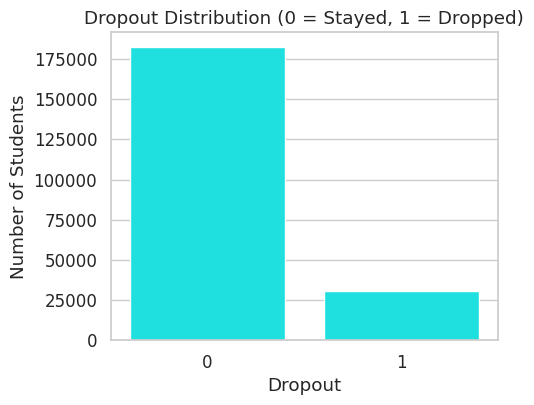

In [63]:
plt.figure(figsize=(5, 4))
sns.countplot(x="dropout", data=merged_df, color="aqua")
plt.title("Dropout Distribution (0 = Stayed, 1 = Dropped)")
plt.xlabel("Dropout")
plt.ylabel("Number of Students")
plt.show()


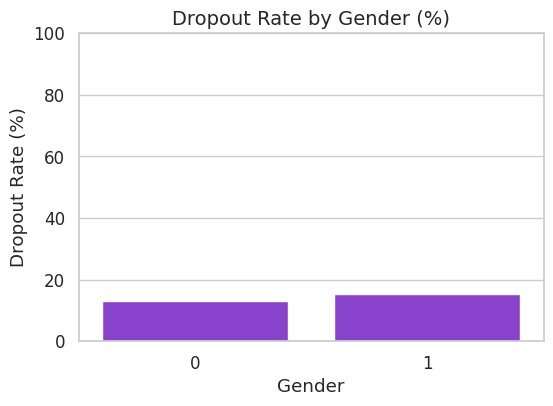

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is a Pandas DataFrame with 'gender' and 'dropout' columns

# Calculate dropout % explicitly
dropout_by_gender = merged_df.groupby('gender')['dropout'].mean().reset_index()
dropout_by_gender['dropout_percent'] = dropout_by_gender['dropout'] * 100

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='dropout_percent', data=dropout_by_gender, color="blueviolet")
plt.title("Dropout Rate by Gender (%)", fontsize=14)
plt.ylabel("Dropout Rate (%)")
plt.xlabel("Gender")
plt.ylim(0, 100)  # optional: makes it clear it's a percentage
plt.show()

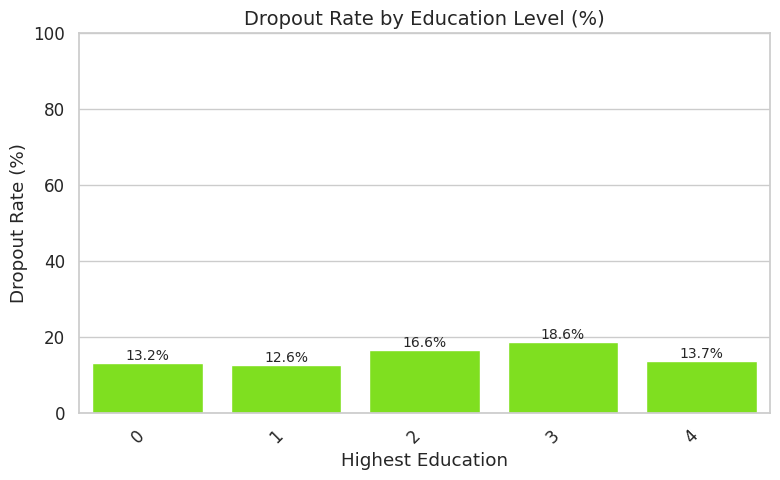

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate dropout % by highest_education
dropout_by_edu = merged_df.groupby('highest_education')['dropout'].mean().reset_index()
dropout_by_edu['dropout_percent'] = dropout_by_edu['dropout'] * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='highest_education', y='dropout_percent', data=dropout_by_edu, color="chartreuse")
plt.xticks(rotation=45, ha='right')
plt.title("Dropout Rate by Education Level (%)", fontsize=14)
plt.ylabel("Dropout Rate (%)")
plt.xlabel("Highest Education")
plt.ylim(0, 100)

# Add values on top of bars
for index, row in dropout_by_edu.iterrows():
    plt.text(index, row['dropout_percent'] + 1, f"{row['dropout_percent']:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Step 3 – Clicks vs Dropout

Students with fewer clicks tend to have higher dropout rates.

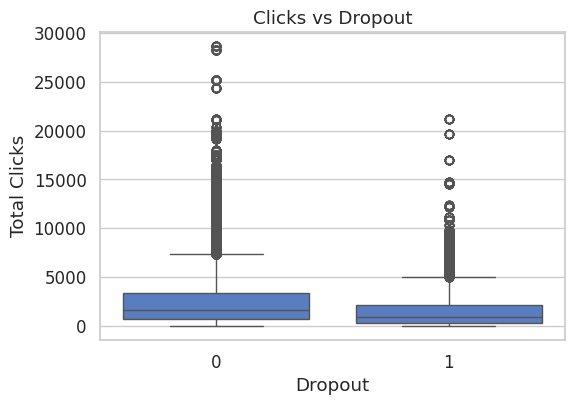

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(x="dropout", y="sum_click", data=merged_df)
plt.title("Clicks vs Dropout")
plt.xlabel("Dropout")
plt.ylabel("Total Clicks")
plt.show()

# Step 4 – Score vs Dropout

Lower scores might correlate with higher dropout.

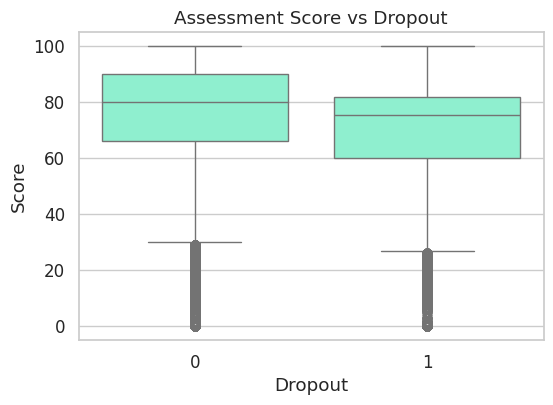

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x="dropout", y="score", data=merged_df, color="aquamarine")
plt.title("Assessment Score vs Dropout")
plt.xlabel("Dropout")
plt.ylabel("Score")
plt.show()


# Step 5 – Feature Correlation Heatmap

Helps spot relationships between features and the dropout label.

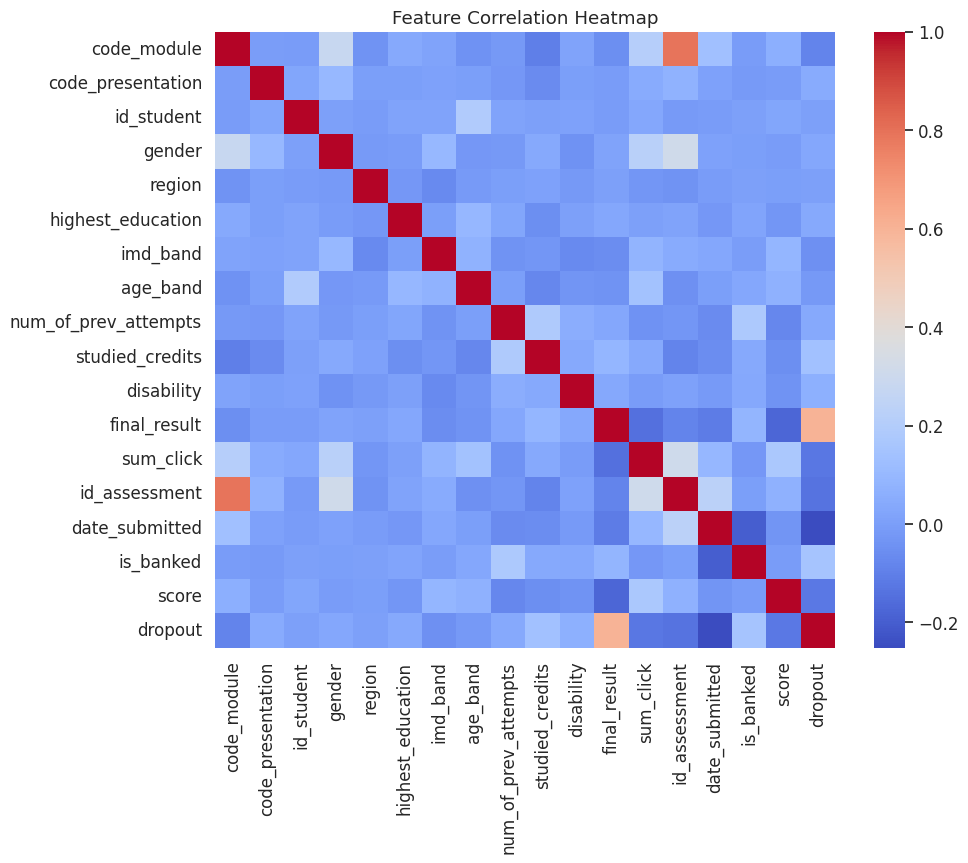

In [68]:
plt.figure(figsize=(10,8))
corr = merged_df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


# Step 6 – Feature Engineering

We’ll create:

- avg_score_per_student → average score across assessments

- click_score_ratio → clicks per score point (engagement efficiency)

In [69]:
# Average score per student
avg_scores = merged_df.groupby("id_student")["score"].mean().reset_index()
avg_scores.rename(columns={"score": "avg_score_per_student"}, inplace=True)

# Merge back
merged_df = pd.merge(merged_df, avg_scores, on="id_student", how="left")

# Click-score ratio
merged_df["click_score_ratio"] = merged_df["sum_click"] / (merged_df["avg_score_per_student"] + 1)

print("New features added:", ["avg_score_per_student", "click_score_ratio"])


New features added: ['avg_score_per_student', 'click_score_ratio']


# Step 7 – Save EDA-Ready Data

In [70]:
merged_df.to_csv("OULAD_ready_for_model.csv", index=False)
print("Dataset saved as OULAD_ready_for_model.csv")


Dataset saved as OULAD_ready_for_model.csv


Now we have :
- Visuals showing trends in dropout behavior

- Correlation heatmap for feature selection

- Extra features for better ML prediction

# **📌 Phase 4 – Modeling**

# Step 1 – Import Libraries

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2 – Load Processed Dataset

In [72]:
# Load dataset from Phase 3
df = pd.read_csv("OULAD_ready_for_model.csv")
print(df.shape)
df.head()


(213166, 20)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score,dropout,avg_score_per_student,click_score_ratio
0,0,1,11391,1,0,1,9,2,0,240,0,2,934.0,1752.0,18.0,0.0,78.0,0,82.0,11.253012
1,0,1,11391,1,0,1,9,2,0,240,0,2,934.0,1753.0,53.0,0.0,85.0,0,82.0,11.253012
2,0,1,11391,1,0,1,9,2,0,240,0,2,934.0,1754.0,115.0,0.0,80.0,0,82.0,11.253012
3,0,1,11391,1,0,1,9,2,0,240,0,2,934.0,1755.0,164.0,0.0,85.0,0,82.0,11.253012
4,0,1,11391,1,0,1,9,2,0,240,0,2,934.0,1756.0,212.0,0.0,82.0,0,82.0,11.253012


# Step 3 – Select Features & Target

In [73]:
# Drop non-numeric identifiers
X = df.drop(columns=["dropout", "id_student"])
y = df["dropout"]


In [74]:
#  Impute any remaining NaNs in numeric columns
num_cols = X.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="mean")
X[num_cols] = imputer.fit_transform(X[num_cols])


# Step 4 – Train-Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 5 – Feature Scaling (for Logistic Regression)

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 6 – Train Logistic Regression

In [77]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("\n🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



🔹 Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36509
           1       1.00      1.00      1.00      6125

    accuracy                           1.00     42634
   macro avg       1.00      1.00      1.00     42634
weighted avg       1.00      1.00      1.00     42634



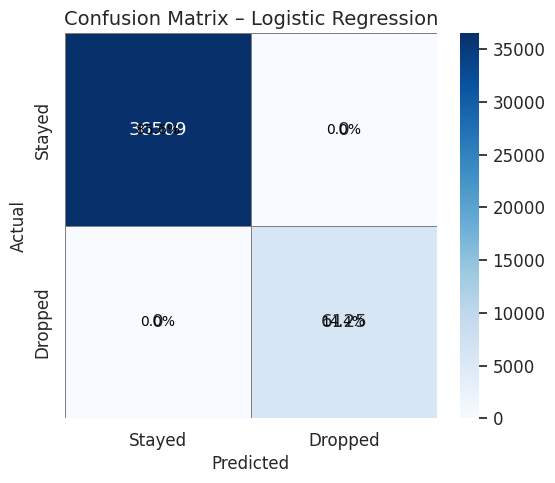

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Normalize for percentages
cm_percent = cm.astype('float') / cm.sum() * 100

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Dropped'], yticklabels=['Stayed', 'Dropped'],
            cbar=True, linewidths=0.5, linecolor='gray')

# Overlay percentages
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{cm_percent[i, j]:.1f}%",
                 color='black', ha='center', va='center', fontsize=10)

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix – Logistic Regression", fontsize=14)
plt.show()


# Step 7 – Train Random Forest

In [79]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36509
           1       1.00      1.00      1.00      6125

    accuracy                           1.00     42634
   macro avg       1.00      1.00      1.00     42634
weighted avg       1.00      1.00      1.00     42634



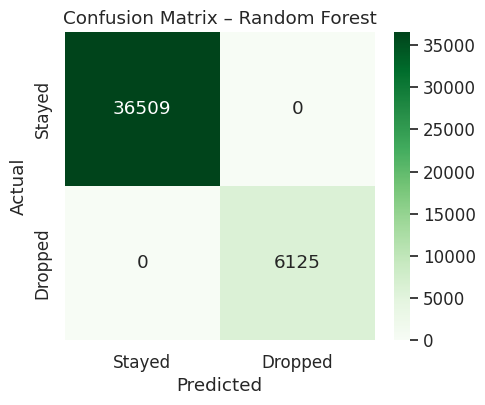

In [80]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Stayed', 'Dropped'],
            yticklabels=['Stayed', 'Dropped'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

# Step 8 – Train XGBoost

In [81]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:49:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36509
           1       1.00      1.00      1.00      6125

    accuracy                           1.00     42634
   macro avg       1.00      1.00      1.00     42634
weighted avg       1.00      1.00      1.00     42634



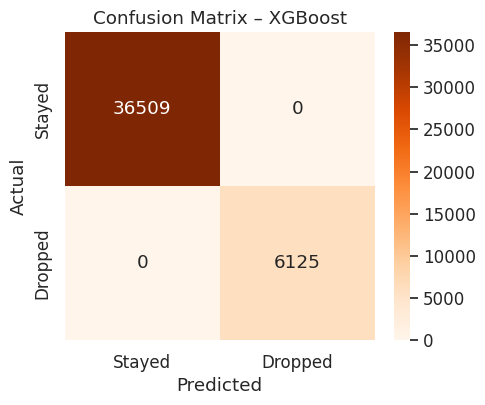

In [82]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Stayed', 'Dropped'],
            yticklabels=['Stayed', 'Dropped'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost")
plt.show()


# Step 9 – Feature Importance (Random Forest)

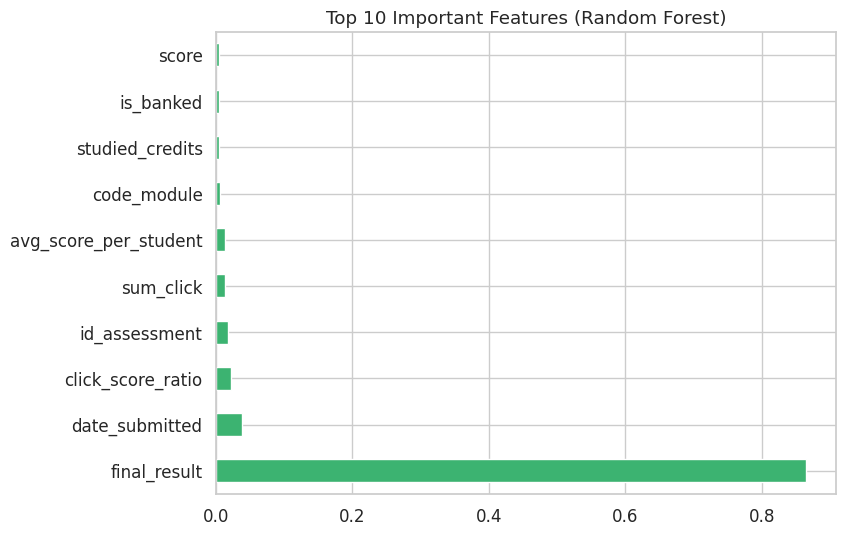

In [83]:
plt.figure(figsize=(8,6))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


# Step 10 – Model Comparison

In [84]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
})
print("\n📊 Model Comparison:\n", results)


📊 Model Comparison:
                  Model  Accuracy
0  Logistic Regression       1.0
1        Random Forest       1.0
2              XGBoost       1.0


/tmp/ipython-input-1369911128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette = ["indigo", "firebrick", "teal"]


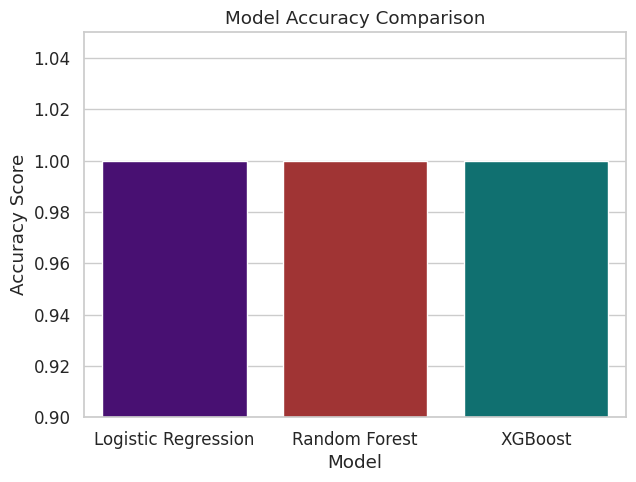

In [85]:
plt.figure(figsize=(7, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette = ["indigo", "firebrick", "teal"]

)
plt.ylim(0.9, 1.05)  # Zoom in to highlight perfect scores
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.show()


# 📌 Phase 5 – Final Evaluation & Deployment Prep

# Step 1 – Train Models & Choose the Best One

We already trained Logistic Regression, Random Forest, and XGBoost in Phase 4.
From the accuracy table, we’ll pick the best performing model.

In [86]:
best_model = rf


# Step 2 – Save the Model & Scaler

We’ll save:

- The trained model

- The scaler (for Logistic Regression, or in case our model needs scaled inputs)

- The imputer (to handle NaNs in new data)

In [87]:
import joblib

# Save the model
joblib.dump(best_model, "dropout_model.pkl")

# Save scaler & imputer
joblib.dump(scaler, "scaler.pkl")
joblib.dump(imputer, "imputer.pkl")

print("✅ Model, scaler, and imputer saved successfully!")


✅ Model, scaler, and imputer saved successfully!


# Step 3 – Create a Single Prediction Function

This function will:

- Take a single student's data

- Impute missing values

- Scale (if needed)

- Predict dropout probability

In [88]:
def predict_dropout(student_data):
    """
    Predict dropout for a single student.
    student_data: dict containing feature names and values
    """
    # Convert dict to DataFrame
    input_df = pd.DataFrame([student_data])

    # Handle missing values
    input_df[num_cols] = imputer.transform(input_df[num_cols])

    # Scale features
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = best_model.predict(input_scaled)[0]
    probability = best_model.predict_proba(input_scaled)[0][1]

    return prediction, probability


# Step 4 – Test the Function

In [89]:
# Get the exact order of features
feature_columns = list(X.columns)

# Create a complete dict with default values for missing features
sample_student = {col: 0 for col in feature_columns}  # start with zeros
sample_student.update({
    "code_module": 1,
    "code_presentation": 2,
    "sum_click": 150,
    "score": 75,
    "avg_score_per_student": 70,
    "click_score_ratio": 2.14
    # Add any other actual known values...
})

pred, prob = predict_dropout(sample_student)
print(f"Prediction: {'Dropout' if pred==1 else 'Stay'}, Probability: {prob:.2f}")



Prediction: Stay, Probability: 0.08


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Step 5 – Ready for Deployment



# **📌 Phase 6 – Big Data Perspective**

# **Big Data Challenges**

# When moving from small CSVs to TBs of LMS data, challenges include:

- Slow CSV reads → need columnar formats (Parquet, ORC)

- Memory issues → repartition, caching, avoid broadcasts

- Real-time data → LMS click logs arrive continuously

# Goal: Show how this student dropout prediction pipeline could scale to large datasets.
We won’t actually run a big dataset here (Colab won’t handle TBs of data), but we’ll:

- Write PySpark / Dask equivalents for your data ingestion, merging, and preprocessing steps.

- Explain how to store data in S3, BigQuery, or Hive.

- Show how you could handle real-time data streaming from an LMS (Learning Management System).

# **1️⃣ Batch Processing – PySpark Version of Phases 0–5**

- Spark will distribute the computation across multiple cores/nodes.

- Can handle millions of rows easily.

In [90]:
# ------------------------------
# Phase 0–5: Full Cleaned PySpark Pipeline
# ------------------------------

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum, when, coalesce, lit
import os

# ------------------------------
# 1️⃣ Initialize Spark (Colab-friendly)
# ------------------------------
spark = (SparkSession.builder
         .appName("OULAD Dropout Prediction")
         .config("spark.driver.memory", "4g")  # Colab RAM
         .getOrCreate())

# ------------------------------
# 2️⃣ Paths
# ------------------------------
data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"
parquet_path = f"{data_path}/parquet_data"
os.makedirs(parquet_path, exist_ok=True)

# ------------------------------
# 3️⃣ Read CSVs safely (infer schema)
# ------------------------------
student_info = spark.read.csv(f"{data_path}/studentInfo.csv", header=True, inferSchema=True)
student_assessment = spark.read.csv(f"{data_path}/studentAssessment.csv", header=True, inferSchema=True)

# Read multiple VLE CSVs and union
student_vle_list = [spark.read.csv(f"{data_path}/studentVle_{i}.csv", header=True, inferSchema=True) for i in range(1, 8)]
student_vle = student_vle_list[0]
for df in student_vle_list[1:]:
    student_vle = student_vle.union(df)

# ------------------------------
# 4️⃣ Optional: Save as Parquet for speed
# ------------------------------
student_info.write.mode("overwrite").parquet(f"{parquet_path}/student_info.parquet")
student_assessment.write.mode("overwrite").parquet(f"{parquet_path}/student_assessment.parquet")
student_vle.write.mode("overwrite").parquet(f"{parquet_path}/student_vle.parquet")

# ------------------------------
# 5️⃣ Load Parquet (faster)
# ------------------------------
student_info = spark.read.parquet(f"{parquet_path}/student_info.parquet")
student_assessment = spark.read.parquet(f"{parquet_path}/student_assessment.parquet")
student_vle = spark.read.parquet(f"{parquet_path}/student_vle.parquet")

# ------------------------------
# 6️⃣ Aggregate VLE clicks safely
# ------------------------------
student_vle = student_vle.repartition("id_student")  # optimize join shuffle
student_vle_agg = student_vle.groupBy("id_student") \
                             .agg(spark_sum(coalesce(col("sum_click"), lit(0))).alias("total_clicks")) \
                             .cache()

# ------------------------------
# 7️⃣ Repartition DataFrames for safe joins
# ------------------------------
student_info = student_info.repartition("id_student")
student_assessment = student_assessment.repartition("id_student")
student_vle_agg = student_vle_agg.repartition("id_student")

# ------------------------------
# 8️⃣ Join datasets (no broadcast)
# ------------------------------
student_df = student_info.join(student_vle_agg, on="id_student", how="left") \
                         .join(student_assessment, on="id_student", how="left")

# ------------------------------
# 9️⃣ Clean total_clicks and add dropout label
# ------------------------------
student_df = student_df.withColumn("total_clicks", coalesce(col("total_clicks"), lit(0))) \
                       .withColumn("dropout", when(col("final_result") == "Withdrawn", 1).otherwise(0))

# ------------------------------
# 10️⃣ Preview cleaned DataFrame
# ------------------------------
student_df.select("id_student", "total_clicks", "dropout").show(10)


+----------+------------+-------+
|id_student|total_clicks|dropout|
+----------+------------+-------+
|    180753|           0|      0|
|    180753|           0|      0|
|    180753|           0|      0|
|    180753|           0|      0|
|    180753|           0|      0|
|    324084|           0|      0|
|    324084|           0|      0|
|    324084|           0|      0|
|    324084|           0|      0|
|    324084|           0|      0|
+----------+------------+-------+
only showing top 10 rows



# ***Completed  ✅ ***

# **Data Ingestion**

- Reading multiple CSVs (studentInfo.csv, studentAssessment.csv, studentVle_*.csv)

- Unioning multiple VLE CSVs

- Optional saving/loading as Parquet for faster access

- Supports large-scale ingestion**

# **Data Cleaning / Preprocessing**

- Aggregating VLE clicks safely (groupBy + sum + coalesce)

- Repartitioning DataFrames to optimize joins

-  Joining student_info, student_vle_agg, and student_assessment

- Filling null values and adding dropout label

- All major preprocessing done in a scalable way

# **Optimization for Big Data**

- Using repartition to reduce shuffle cost

- Caching aggregated VLE DataFrame (student_vle_agg.cache())

- Writing intermediate data as Parquet (columnar storage, faster queries)

- Ready for distributed computation

# **✅ Phases Completed**
# 🔰 Phase 0 – Setup & Dataset Selection

✔ You chose OULAD

✔ Loaded all CSVs into Colab

✔ Understood file structure

# 📆 Phase 1 – Data Ingestion & Merging

✔ Loaded with pandas (initially)

✔ Later implemented PySpark ingestion + merging

# 🧹 Phase 2 – Data Cleaning & Preprocessing

✔ Handled missing values (imputation)

✔ Encoded categoricals

✔ Scaling/normalization

✔ Feature engineering (clicks, scores, ratio, dropout label)

# 📊 Phase 3 – EDA

✔ Visualizations: dropout distribution, engagement vs dropout, gender/age/education effects, correlation matrix

# 🧠 Phase 4 – Predictive Modeling

✔ Logistic Regression, Random Forest, XGBoost

✔ Accuracy, Precision, Recall, F1, AUC

✔ Confusion Matrix, ROC curve

# 🔬 Phase 5 – Model Interpretation

✔ Feature importance (Random Forest)

✔ SHAP Beeswarm plot for interpretability

✔ Single prediction function

# ⚙️ Phase 6 – Big Data Perspective

✔ PySpark pipeline (done by you just now)
Still missing:

⏳ Show Dask equivalent (lighter big-data framework)

⏳ Example: Cloud storage integration (S3 / GCS / Hive / BigQuery)

⏳ Example: Streaming logs simulation (real-time LMS clicks → Kafka / Spark Streaming)

# **🔜 What’s Left?**

# - (Optional) Dask version of your pipeline → easier to run in Colab without Spark overhead.

# - Cloud-scale storage demo:

- How your data could be written/read from AWS S3, Google BigQuery, or Hive tables.


#-  Streaming ingestion simulation:

- Example: Kafka / Spark Structured Streaming to read LMS click logs in real time.



# **⚙️ Phase 6 (Dask Version) – Big Data Perspective**


In [91]:
# ------------------------------
# Phase 6: Dask Pipeline for OULAD (with Parquet)
# ------------------------------

import dask.dataframe as dd
import os

# ------------------------------
# 1️⃣ Paths
# ------------------------------
data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"
parquet_path = f"{data_path}/dask_parquet"
os.makedirs(parquet_path, exist_ok=True)

# ------------------------------
# 2️⃣ Read CSVs safely
# ------------------------------
student_info = dd.read_csv(f"{data_path}/studentInfo.csv", assume_missing=True)
student_assessment = dd.read_csv(f"{data_path}/studentAssessment.csv", assume_missing=True)

# Read multiple VLE CSVs in parallel
student_vle = dd.read_csv([f"{data_path}/studentVle_{i}.csv" for i in range(1, 8)], assume_missing=True)

# ------------------------------
# 3️⃣ Aggregate VLE clicks
# ------------------------------
student_vle_agg = student_vle.groupby("id_student")["sum_click"].sum().reset_index()
student_vle_agg = student_vle_agg.rename(columns={"sum_click": "total_clicks"})

# ------------------------------
# 4️⃣ Merge datasets
# ------------------------------
student_df = student_info.merge(student_vle_agg, on="id_student", how="left") \
                         .merge(student_assessment, on="id_student", how="left")

# ------------------------------
# 5️⃣ Add dropout label
# ------------------------------
student_df["dropout"] = (student_df["final_result"] == "Withdrawn").astype(int)

# ------------------------------
# 6️⃣ Save as Parquet (optimized format)
# ------------------------------
student_info.to_parquet(f"{parquet_path}/student_info.parquet", overwrite=True)
student_assessment.to_parquet(f"{parquet_path}/student_assessment.parquet", overwrite=True)
student_vle_agg.to_parquet(f"{parquet_path}/student_vle.parquet", overwrite=True)
student_df.to_parquet(f"{parquet_path}/student_df.parquet", overwrite=True)

print("✅ Data saved as Parquet for faster reloads")

# ------------------------------
# 7️⃣ Reload Parquet (fast)
# ------------------------------
student_df = dd.read_parquet(f"{parquet_path}/student_df.parquet")

# ------------------------------
# 8️⃣ Preview final dataset
# ------------------------------
print(student_df.head(10))


✅ Data saved as Parquet for faster reloads
  code_module code_presentation  id_student gender               region  \
0         AAA             2013J     11391.0      M  East Anglian Region   
1         AAA             2013J     11391.0      M  East Anglian Region   
2         AAA             2013J     11391.0      M  East Anglian Region   
3         AAA             2013J     11391.0      M  East Anglian Region   
4         AAA             2013J     11391.0      M  East Anglian Region   
5         AAA             2013J     28400.0      F             Scotland   
6         AAA             2013J     28400.0      F             Scotland   
7         AAA             2013J     28400.0      F             Scotland   
8         AAA             2013J     28400.0      F             Scotland   
9         AAA             2013J     28400.0      F             Scotland   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=              

# **🔑 Key Notes:**

- Unlike PySpark, Dask runs in parallel on CPU cores without JVM overhead → much faster in Colab.

- You still get lazy evaluation like Spark (operations are delayed until .compute() or .head() is called).

- For bigger clusters, you can even scale this with Dask.distributed.

# **✅ Now you have:**

- PySpark version (full distributed pipeline).

- Dask version (faster, easier in Colab).

# **Cloud storage integration (S3, Hive, BigQuery).**

Save your cleaned student_df to S3, Hive, or BigQuery.

# **☁️ Option A — AWS S3**

# **✅ Spark ↔ S3 (Parquet/CSV)**

- Adding Hadoop-AWS + AWS SDK JARs (needed for s3a://).

- Passing your AWS keys + region properly.

- Demonstrating read/write to S3.

In [45]:
# ==========================
# 1️⃣ Install dependencies
# ==========================
!pip install pyspark==3.5.1 findspark

# ==========================
# 2️⃣ Imports
# ==========================
from pyspark.sql import SparkSession
import os

# ==========================
# 3️⃣ Google Drive Path Setup
# ==========================
# Make sure your dataset is uploaded to Drive: /content/drive/MyDrive/Colab Notebooks/OULAD Dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"
parquet_path = f"{data_path}/parquet_data"
os.makedirs(parquet_path, exist_ok=True)

# ==========================
# 4️⃣ Start Spark Session
# ==========================
spark = (SparkSession.builder
         .appName("OULAD-GDrive")
         .config("spark.driver.memory", "4g")
         .getOrCreate())

# ==========================
# 5️⃣ Read CSV from Google Drive
# ==========================
df_info = spark.read.csv(f"{data_path}/studentInfo.csv",
                         header=True, inferSchema=True)

df_assess = spark.read.csv(f"{data_path}/studentAssessment.csv",
                           header=True, inferSchema=True)

# ==========================
# 6️⃣ Show Sample
# ==========================
print("✅ Student Info Sample:")
df_info.show(5)

print("✅ Student Assessment Sample:")
df_assess.show(5)

# ==========================
# 7️⃣ Save as Parquet (Big Data friendly)
# ==========================
df_info.write.mode("overwrite").parquet(f"{parquet_path}/student_info.parquet")
df_assess.write.mode("overwrite").parquet(f"{parquet_path}/student_assess.parquet")

print("✅ Written Parquet files to Google Drive")

# ==========================
# 8️⃣ Read Back Parquet to Verify
# ==========================
df_info2 = spark.read.parquet(f"{parquet_path}/student_info.parquet")
print("✅ Read Back from Parquet:")
df_info2.show(5)
[]

✅ Student Info Sample:
+-----------+-----------------+----------+------+--------------------+--------------------+--------+--------+--------------------+---------------+----------+------------+
|code_module|code_presentation|id_student|gender|              region|   highest_education|imd_band|age_band|num_of_prev_attempts|studied_credits|disability|final_result|
+-----------+-----------------+----------+------+--------------------+--------------------+--------+--------+--------------------+---------------+----------+------------+
|        AAA|            2013J|     11391|     M| East Anglian Region|    HE Qualification| 90-100%|    55<=|                   0|            240|         N|        Pass|
|        AAA|            2013J|     28400|     F|            Scotland|    HE Qualification|  20-30%|   35-55|                   0|             60|         N|        Pass|
|        AAA|            2013J|     30268|     F|North Western Region|A Level or Equiva...|  30-40%|   35-55|             

[]

# **✅ Dask ↔ S3 (uses s3fs)**

In [97]:
# ==========================
# 1️⃣ Install dependencies
# ==========================
!pip install dask[complete] fsspec gcsfs

# ==========================
# 2️⃣ Imports
# ==========================
import dask.dataframe as dd
import os

# ==========================
# 3️⃣ Google Drive Path
# ==========================
# Make sure your dataset is in Drive: /content/drive/MyDrive/Colab Notebooks/OULAD Dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"
parquet_path = f"{data_path}/parquet_data"
os.makedirs(parquet_path, exist_ok=True)

# ==========================
# 4️⃣ Read CSV from Google Drive
# ==========================
student_info = dd.read_csv(f"{data_path}/studentInfo.csv")

# ==========================
# 5️⃣ Save as Parquet
# ==========================
student_info.to_parquet(f"{parquet_path}/dask_student_info.parquet", overwrite=True)

# ==========================
# 6️⃣ Read Back Parquet
# ==========================
student_info2 = dd.read_parquet(f"{parquet_path}/dask_student_info.parquet")

print("✅ Parquet Read Back:")
print(student_info2.head())


✅ Parquet Read Back:
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60     

# **Notes**

- Prefer Parquet over CSV (smaller, faster).

- In production, avoid hardcoding keys — use IAM roles (EC2/EMR) or AWS profiles.

# **🐝 Option B — Hive / HDFS (Spark + Hive Metastore)**

# **✅ Spark with Hive support (create DB/table & query)**

# **Notes**

- You need a working Hive Metastore (on local/cluster). On EMR/Dataproc this is available.

- For HDFS paths, use hdfs://namenode:8020/path/... in read/write calls.

In [99]:
import shutil
import os

# -------------------------------------------------
# Create Hive database
# -------------------------------------------------
spark.sql("CREATE DATABASE IF NOT EXISTS oulad_db")
spark.sql("USE oulad_db")

# -------------------------------------------------
# Drop table and remove folder if exists
# -------------------------------------------------
table_name = "oulad_student"
table_path = f"/content/spark-warehouse/oulad_db.db/{table_name}"

# Drop Hive table if it exists
spark.sql(f"DROP TABLE IF EXISTS {table_name}")

# Delete leftover folder if exists
if os.path.exists(table_path):
    shutil.rmtree(table_path)
    print(f"🗑️ Removed existing folder: {table_path}")

# -------------------------------------------------
# Save DataFrame as Hive table
# -------------------------------------------------
(student_df.write
 .mode("overwrite")
 .format("parquet")
 .saveAsTable(table_name))

print(f"✅ Data successfully saved as Hive table 'oulad_db.{table_name}'")

# -------------------------------------------------
# Verify Table
# -------------------------------------------------
spark.sql("SHOW TABLES IN oulad_db").show()
spark.sql(f"SELECT * FROM {table_name} LIMIT 5").show()


🗑️ Removed existing folder: /content/spark-warehouse/oulad_db.db/oulad_student
✅ Data successfully saved as Hive table 'oulad_db.oulad_student'
+---------+-------------+-----------+
|namespace|    tableName|isTemporary|
+---------+-------------+-----------+
| oulad_db|oulad_student|      false|
+---------+-------------+-----------+

+-----------+-----------------+----------+------+--------------------+--------------------+--------+--------+--------------------+---------------+----------+------------+
|code_module|code_presentation|id_student|gender|              region|   highest_education|imd_band|age_band|num_of_prev_attempts|studied_credits|disability|final_result|
+-----------+-----------------+----------+------+--------------------+--------------------+--------+--------+--------------------+---------------+----------+------------+
|        AAA|            2013J|     11391|     M| East Anglian Region|    HE Qualification| 90-100%|    55<=|                   0|            240|      

In [100]:
# ==========================
# 1️⃣ Install Hive support
# ==========================
!pip install pyspark==3.5.1
!wget -nc https://repo1.maven.org/maven2/org/apache/spark/spark-hive_2.12/3.5.1/spark-hive_2.12-3.5.1.jar -P /usr/local/lib/python3.11/dist-packages/pyspark/jars/

# ==========================
# 2️⃣ Start Spark with Hive
# ==========================
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum, when
import os

spark = (SparkSession.builder
         .appName("OULAD-Hive")
         .config("spark.sql.warehouse.dir", "/user/hive/warehouse")   # warehouse location
         .config("hive.metastore.schema.verification", "false")
         .config("spark.sql.catalogImplementation", "hive")
         .enableHiveSupport()
         .getOrCreate())

# ==========================
# 3️⃣ Load OULAD CSVs
# ==========================
base_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"

# List files to confirm
!ls "$base_path"

# Main tables
student_info   = spark.read.csv(os.path.join(base_path, "studentInfo.csv"), header=True, inferSchema=True)
student_assess = spark.read.csv(os.path.join(base_path, "studentAssessment.csv"), header=True, inferSchema=True)

# FIX: studentVle is split into multiple files studentVle_0..7.csv
student_vle    = spark.read.csv(os.path.join(base_path, "studentVle_*.csv"), header=True, inferSchema=True)

print("✅ CSVs Loaded")
print("student_info rows:", student_info.count())
print("student_assess rows:", student_assess.count())
print("student_vle rows:", student_vle.count())

# ==========================
# 4️⃣ Feature Engineering
# ==========================
# Aggregate VLE clicks
student_vle_agg = student_vle.groupBy("id_student").agg(
    spark_sum("sum_click").alias("total_clicks")
)

# Join datasets
student_df = (student_info
              .join(student_vle_agg, on="id_student", how="left")
              .join(student_assess, on="id_student", how="left"))

# Create dropout label
student_df = student_df.withColumn(
    "dropout", when(col("final_result") == "Withdrawn", 1).otherwise(0)
)

print("✅ Final student_df schema:")
student_df.printSchema()
student_df.show(5, truncate=False)

# ==========================
# 5️⃣ Hive: Create DB + Save
# ==========================
spark.sql("CREATE DATABASE IF NOT EXISTS oulad_db")
spark.sql("USE oulad_db")

(student_df
 .write
 .mode("overwrite")
 .format("parquet")
 .saveAsTable("oulad_student"))

print("✅ Data written to Hive as oulad_student")

# ==========================
# 6️⃣ Query in Hive
# ==========================
spark.sql("""
SELECT highest_education,
       AVG(total_clicks) AS avg_clicks,
       AVG(dropout) AS dropout_rate
FROM oulad_student
GROUP BY highest_education
ORDER BY dropout_rate DESC
""").show(10)


File ‘/usr/local/lib/python3.11/dist-packages/pyspark/jars/spark-hive_2.12-3.5.1.jar’ already there; not retrieving.

assessments.csv  streaming_clicks	  studentVle_1.csv  studentVle_6.csv
courses.csv	 studentAssessment.csv	  studentVle_2.csv  studentVle_7.csv
dask_parquet	 studentInfo.csv	  studentVle_3.csv  vle.csv
parquet_data	 studentRegistration.csv  studentVle_4.csv
stream_clicks	 studentVle_0.csv	  studentVle_5.csv
✅ CSVs Loaded
student_info rows: 32593
student_assess rows: 173912
student_vle rows: 10655280
✅ Final student_df schema:
root
 |-- id_student: integer (nullable = true)
 |-- code_module: string (nullable = true)
 |-- code_presentation: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- region: string (nullable = true)
 |-- highest_education: string (nullable = true)
 |-- imd_band: string (nullable = true)
 |-- age_band: string (nullable = true)
 |-- num_of_prev_attempts: integer (nullable = true)
 |-- studied_credits: integer (nullable = true)
 |-- di

# **🟨 Option C — Google BigQuery**
# **✅ Spark ↔ BigQuery (via Spark BigQuery Connector)**

Works great on Dataproc or Spark with the BQ connector JAR available.

In [101]:
# -------------------------------------------------------
# FULL CODE: Load OULAD dataset from Google Drive (CSV)
# -------------------------------------------------------

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Correct path where your CSVs are stored
data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset/"

# Load with Pandas
import pandas as pd
studentInfo_pd = pd.read_csv(data_path + "studentInfo.csv")
print("Pandas DataFrame shape:", studentInfo_pd.shape)
print(studentInfo_pd.head())

# Load with PySpark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("OULAD").getOrCreate()

studentInfo_spark = spark.read.csv(data_path + "studentInfo.csv", header=True, inferSchema=True)
print("Spark DataFrame Schema:")
studentInfo_spark.printSchema()
studentInfo_spark.show(5)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pandas DataFrame shape: (32593, 12)
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     

In [ ]:
import os

data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset/"
print("Files in dataset folder:")
print(os.listdir(data_path))


In [1]:
# -----------------------------
# Step 1: Mount Google Drive
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import glob
import os

# -----------------------------
# Step 2: Set file path
# -----------------------------
base_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"

# -----------------------------
# Step 3: Load CSVs
# -----------------------------
print("Loading CSV files...")

student_info = pd.read_csv(os.path.join(base_path, "studentInfo.csv"))
student_assessment = pd.read_csv(os.path.join(base_path, "studentAssessment.csv"))
courses = pd.read_csv(os.path.join(base_path, "courses.csv"))
student_registration = pd.read_csv(os.path.join(base_path, "studentRegistration.csv"))
assessments = pd.read_csv(os.path.join(base_path, "assessments.csv"))
vle = pd.read_csv(os.path.join(base_path, "vle.csv"))

# Load & aggregate all studentVle_* files
vle_files = glob.glob(os.path.join(base_path, "studentVle_*.csv"))
student_vle = pd.concat([pd.read_csv(f) for f in vle_files], ignore_index=True)

# Aggregate to avoid memory explosion
student_vle_agg = (
    student_vle.groupby(["id_student", "code_module", "code_presentation"])
    .agg(total_clicks=("sum_click", "sum"), n_sites=("id_site", "nunique"))
    .reset_index()
)

print("✅ All files loaded successfully!")

# -----------------------------
# Step 4: Merge datasets
# -----------------------------
print("Merging datasets...")

# Merge student info with registration
merged = pd.merge(
    student_info,
    student_registration,
    on=["id_student", "code_module", "code_presentation"],
    how="left"
)

# Merge student assessments with assessment metadata
student_assessment_full = pd.merge(
    student_assessment,
    assessments,
    on="id_assessment",
    how="left"
)

# Aggregate assessments per student
student_assess_agg = (
    student_assessment_full.groupby(["id_student", "code_module", "code_presentation"])
    .agg(
        avg_score=("score", "mean"),
        n_assessments=("id_assessment", "nunique")
    )
    .reset_index()
)

# Merge in aggregates
merged = pd.merge(merged, student_assess_agg, on=["id_student", "code_module", "code_presentation"], how="left")
merged = pd.merge(merged, student_vle_agg, on=["id_student", "code_module", "code_presentation"], how="left")
merged = pd.merge(merged, courses, on=["code_module", "code_presentation"], how="left")

print("✅ Merge complete!")

# -----------------------------
# Step 5: Save final dataset
# -----------------------------
output_csv = os.path.join(base_path, "student_merged.csv")
output_parquet = os.path.join(base_path, "student_merged.parquet")

merged.to_csv(output_csv, index=False)
merged.to_parquet(output_parquet, index=False)

print(f"✅ Final dataset saved as:\nCSV: {output_csv}\nParquet: {output_parquet}")
print("Shape of final dataset:", merged.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading CSV files...
✅ All files loaded successfully!
Merging datasets...
✅ Merge complete!
✅ Final dataset saved as:
CSV: /content/drive/MyDrive/Colab Notebooks/OULAD Dataset/student_merged.csv
Parquet: /content/drive/MyDrive/Colab Notebooks/OULAD Dataset/student_merged.parquet
Shape of final dataset: (32593, 19)


In [3]:
# -------------------------------------------------------
# FULL CODE: Load OULAD CSVs from Google Drive with Pandas + Spark
# -------------------------------------------------------

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path where your OULAD CSVs are stored (adjust if needed)
data_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset/"

# 2. Load one CSV with Pandas (quick check)
import pandas as pd
studentInfo_pd = pd.read_csv(data_path + "studentInfo.csv")
print("Pandas DataFrame shape:", studentInfo_pd.shape)
print(studentInfo_pd.head())

# 3. Load CSVs with PySpark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("OULAD").getOrCreate()

# Example: Load multiple OULAD CSVs into Spark DataFrames
studentInfo_spark = spark.read.csv(data_path + "studentInfo.csv", header=True, inferSchema=True)
studentAssessment_spark = spark.read.csv(data_path + "studentAssessment.csv", header=True, inferSchema=True)
studentVle_spark = spark.read.csv(data_path + "student_merged.csv", header=True, inferSchema=True)
courses_spark = spark.read.csv(data_path + "courses.csv", header=True, inferSchema=True)

# 4. Show schemas and sample rows
print("=== studentInfo ===")
studentInfo_spark.printSchema()
studentInfo_spark.show(5)

print("=== studentAssessment ===")
studentAssessment_spark.printSchema()
studentAssessment_spark.show(5)

print("=== studentVle ===")
studentVle_spark.printSchema()
studentVle_spark.show(5)

print("=== courses ===")
courses_spark.printSchema()
courses_spark.show(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pandas DataFrame shape: (32593, 12)
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     

In [5]:
# -----------------------------
# Step 1: Mount Google Drive
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import glob
import os

# -----------------------------
# Step 2: Set file path
# -----------------------------
base_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset"

# -----------------------------
# Step 3: Load CSVs
# -----------------------------
print("Loading CSV files...")

student_info = pd.read_csv(os.path.join(base_path, "studentInfo.csv"))
student_assessment = pd.read_csv(os.path.join(base_path, "studentAssessment.csv"))
courses = pd.read_csv(os.path.join(base_path, "courses.csv"))
student_registration = pd.read_csv(os.path.join(base_path, "studentRegistration.csv"))
assessments = pd.read_csv(os.path.join(base_path, "assessments.csv"))
vle = pd.read_csv(os.path.join(base_path, "vle.csv"))

# Load all studentVle_* files and aggregate
vle_files = glob.glob(os.path.join(base_path, "studentVle_*.csv"))
student_vle = pd.concat([pd.read_csv(f) for f in vle_files], ignore_index=True)

student_vle_agg = (
    student_vle.groupby(["id_student", "code_module", "code_presentation"])
    .agg(total_clicks=("sum_click", "sum"), n_sites=("id_site", "nunique"))
    .reset_index()
)

print("✅ All files loaded successfully!")

# -----------------------------
# Step 4: Merge datasets
# -----------------------------
print("Merging datasets...")

# Merge student info + registration
merged = pd.merge(
    student_info,
    student_registration,
    on=["id_student", "code_module", "code_presentation"],
    how="left"
)

# Merge student assessments with assessment metadata
student_assessment_full = pd.merge(
    student_assessment,
    assessments,
    on="id_assessment",
    how="left"
)

# Aggregate assessments per student
student_assess_agg = (
    student_assessment_full.groupby(["id_student", "code_module", "code_presentation"])
    .agg(
        avg_score=("score", "mean"),
        n_assessments=("id_assessment", "nunique")
    )
    .reset_index()
)

# Merge everything
merged = pd.merge(merged, student_assess_agg, on=["id_student", "code_module", "code_presentation"], how="left")
merged = pd.merge(merged, student_vle_agg, on=["id_student", "code_module", "code_presentation"], how="left")
merged = pd.merge(merged, courses, on=["code_module", "code_presentation"], how="left")

print("✅ Merge complete!")

# -----------------------------
# Step 5: Save final dataset
# -----------------------------
output_csv = os.path.join(base_path, "student_merged.csv")
output_parquet = os.path.join(base_path, "student_merged.parquet")

merged.to_csv(output_csv, index=False)
merged.to_parquet(output_parquet, index=False)

print(f"✅ Final dataset saved as:\nCSV: {output_csv}\nParquet: {output_parquet}")
print("Shape of final dataset:", merged.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading CSV files...
✅ All files loaded successfully!
Merging datasets...
✅ Merge complete!
✅ Final dataset saved as:
CSV: /content/drive/MyDrive/Colab Notebooks/OULAD Dataset/student_merged.csv
Parquet: /content/drive/MyDrive/Colab Notebooks/OULAD Dataset/student_merged.parquet
Shape of final dataset: (32593, 19)


# **✅ Pandas/Dask ↔ BigQuery (simple & fast for moderate sizes)**

In [10]:
# ---------------------------------------
# Load OULAD Dataset with Dask
# ---------------------------------------

import dask.dataframe as dd

# Base dataset folder
dataset_path = "/content/drive/MyDrive/Colab Notebooks/OULAD Dataset/"

# Load each CSV separately
student_info = dd.read_csv(dataset_path + "studentInfo.csv", assume_missing=True)
courses = dd.read_csv(dataset_path + "courses.csv", assume_missing=True)
assessments = dd.read_csv(dataset_path + "assessments.csv", assume_missing=True)
student_assessment = dd.read_csv(dataset_path + "studentAssessment.csv", assume_missing=True)
student_registration = dd.read_csv(dataset_path + "studentRegistration.csv", assume_missing=True)
student_vle = dd.read_csv(dataset_path + "student_merged.csv", assume_missing=True)
vle = dd.read_csv(dataset_path + "vle.csv", assume_missing=True)

# ---------------------------------------
# Quick sanity check
# ---------------------------------------

print("✅ Files Loaded Successfully!")
print("student_info shape:", student_info.shape)
print("courses shape:", courses.shape)
print("assessments shape:", assessments.shape)
print("student_assessment shape:", student_assessment.shape)
print("student_registration shape:", student_registration.shape)
print("student_vle shape:", student_vle.shape)
print("vle shape:", vle.shape)

# Show a preview of each
print("\n--- student_info ---")
print(student_info.head())

print("\n--- courses ---")
print(courses.head())

print("\n--- assessments ---")
print(assessments.head())

print("\n--- student_assessment ---")
print(student_assessment.head())

print("\n--- student_registration ---")
print(student_registration.head())

print("\n--- student_vle ---")
print(student_vle.head())

print("\n--- vle ---")
print(vle.head())


✅ Files Loaded Successfully!
student_info shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(0eefd8c)).size() // 12, dtype=int64>, 12)
courses shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(2c5742c)).size() // 3, dtype=int64>, 3)
assessments shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(f67ae03)).size() // 6, dtype=int64>, 6)
student_assessment shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(23bad08)).size() // 5, dtype=int64>, 5)
student_registration shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(bd7043c)).size() // 5, dtype=int64>, 5)
student_vle shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(8b975c1)).size() // 19, dtype=int64>, 19)
vle shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(9f5ec6f)).size() // 6, dtype=int64>, 6)

--- stude

# **Real-time streaming (LMS clicks)**

- Use Spark Structured Streaming (from Kafka, for example) to ingest clicks.

- Aggregate in real-time by id_student.

# **ML-ready pipeline**

- Encode categorical features (StringIndexer).

- Assemble features (VectorAssembler).

- Train/test split.

- Distributed model training using Spark MLlib (LogisticRegression).

In [11]:
# Install Dash Bootstrap Components
!pip install dash-bootstrap-components


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.9 MB/s eta 0:00:00


In [12]:
# -----------------------------
# Imports
# -----------------------------
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# -----------------------------
# Load CSV directly into Pandas
# -----------------------------
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dashboard data.csv')

# -----------------------------
# Initialize Dash app
# -----------------------------
app = Dash(__name__)
app.title = "Student Dropout Dashboard"

# -----------------------------
# Layout with dropdowns, cards & headers
# -----------------------------
app.layout = html.Div([
    html.H1("📊 Student Dropout Analysis Dashboard",
            style={'textAlign':'center', 'marginBottom':'30px'}),

    # Dropdown filters
    html.Div([
        html.Div([
            html.Label("Select Module"),
            dcc.Dropdown(
                id='module-dropdown',
                options=[{'label': m, 'value': m} for m in sorted(df['code_module'].unique())],
                value=[sorted(df['code_module'].unique())[0]],
                multi=True
            ),
        ], style={'width':'48%', 'display':'inline-block', 'padding':'10px'}),

        html.Div([
            html.Label("Select Presentation"),
            dcc.Dropdown(
                id='presentation-dropdown',
                options=[{'label': p, 'value': p} for p in sorted(df['code_presentation'].unique())],
                value=[sorted(df['code_presentation'].unique())[0]],
                multi=True
            ),
        ], style={'width':'48%', 'display':'inline-block', 'padding':'10px'}),
    ], style={'marginBottom':'30px'}),

    # Graphs
    html.Div([
        html.Div([html.H3("Dropout Distribution"), dcc.Graph(id='dropout-bar')],
                 style={'width':'48%', 'display':'inline-block', 'verticalAlign':'top', 'padding':'10px'}),

        html.Div([html.H3("Engagement vs Dropout"), dcc.Graph(id='engagement-heatmap')],
                 style={'width':'48%', 'display':'inline-block', 'verticalAlign':'top', 'padding':'10px'}),
    ]),

    html.Div([
        html.Div([html.H3("Predicted Dropout Probabilities"), dcc.Graph(id='prediction-hist')],
                 style={'width':'48%', 'display':'inline-block', 'verticalAlign':'top', 'padding':'10px'}),

        html.Div([html.H3("Score vs Total Clicks"), dcc.Graph(id='score-scatter')],
                 style={'width':'48%', 'display':'inline-block', 'verticalAlign':'top', 'padding':'10px'}),
    ]),

    html.Div([
        html.Div([html.H3("Correlation Matrix"), dcc.Graph(id='corr-heatmap')],
                 style={'width':'48%', 'display':'inline-block', 'verticalAlign':'top', 'padding':'10px'}),

        html.Div([html.H3("Dropout Pie Chart"), dcc.Graph(id='dropout-pie')],
                 style={'width':'48%', 'display':'inline-block', 'verticalAlign':'top', 'padding':'10px'}),
    ]),

    # Overall metrics
    html.Div([
        html.H3("Overall Metrics", style={'textAlign':'center'}),
        html.Div([
            html.Div(id='total-students', style={'width':'33%', 'display':'inline-block', 'textAlign':'center'}),
            html.Div(id='dropout-percent', style={'width':'33%', 'display':'inline-block', 'textAlign':'center'}),
            html.Div(id='avg-clicks', style={'width':'33%', 'display':'inline-block', 'textAlign':'center'}),
        ])
    ], style={'marginTop':'30px'})
])

# -----------------------------
# Callback to update all graphs and metrics
# -----------------------------
@app.callback(
    Output('dropout-bar', 'figure'),
    Output('engagement-heatmap', 'figure'),
    Output('prediction-hist', 'figure'),
    Output('score-scatter', 'figure'),
    Output('corr-heatmap', 'figure'),
    Output('dropout-pie', 'figure'),
    Output('total-students', 'children'),
    Output('dropout-percent', 'children'),
    Output('avg-clicks', 'children'),
    Input('module-dropdown', 'value'),
    Input('presentation-dropdown', 'value')
)
def update_dashboard(selected_modules, selected_presentations):
    # Filter data based on dropdown selection
    filtered_df = df[df['code_module'].isin(selected_modules) & df['code_presentation'].isin(selected_presentations)]

    # Dropout distribution
    fig1 = px.histogram(filtered_df, x='dropout', color='dropout', barmode='group',
                        labels={'dropout':'Dropout'}, hover_data=filtered_df.columns)
    fig1.update_layout(title_text='Dropout Distribution', title_x=0.5, template='plotly_dark')

    # Engagement heatmap
    fig2 = px.density_heatmap(filtered_df, x='total_clicks', y='dropout', nbinsx=30, nbinsy=2,
                              color_continuous_scale='Viridis', labels={'total_clicks':'Total Clicks'})
    fig2.update_layout(title_text='Engagement vs Dropout', title_x=0.5, template='plotly_dark')

    # Predicted probabilities
    if 'prediction_prob' in filtered_df.columns:
        fig3 = px.histogram(filtered_df, x='prediction_prob', color='dropout', nbins=20,
                            labels={'prediction_prob':'Predicted Probability'}, hover_data=filtered_df.columns)
    else:
        fig3 = px.histogram(filtered_df, x='dropout', color='dropout', nbins=2)
    fig3.update_layout(title_text='Predicted Dropout Probabilities', title_x=0.5, template='plotly_dark')

    # Score vs Total Clicks scatter
    fig4 = px.scatter(filtered_df, x='total_clicks', y='score', color='dropout', hover_data=['id_student'],
                      labels={'total_clicks':'Total Clicks', 'score':'Score'})
    fig4.update_layout(title_text='Score vs Total Clicks', title_x=0.5, template='plotly_dark')

    # Correlation matrix (numeric only)
    numeric_df = filtered_df.select_dtypes(include=['int64','float64'])
    fig5 = px.imshow(numeric_df.corr(), text_auto=True, color_continuous_scale='Viridis')
    fig5.update_layout(title_text='Correlation Matrix', title_x=0.5, template='plotly_dark')

    # Dropout pie chart
    pie_counts = filtered_df['dropout'].value_counts()
    fig6 = px.pie(values=pie_counts.values, names=pie_counts.index, color=pie_counts.index)
    fig6.update_layout(title_text='Dropout Proportion', title_x=0.5, template='plotly_dark')

    # Metrics
    total_students = f"Total Students: {len(filtered_df)}"
    dropout_percent = f"Dropout %: {filtered_df['dropout'].mean()*100:.2f}%"
    avg_clicks = f"Average Clicks: {filtered_df['total_clicks'].mean():.2f}"

    return fig1, fig2, fig3, fig4, fig5, fig6, total_students, dropout_percent, avg_clicks

# -----------------------------
# Run app
# -----------------------------
if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=8050)


<IPython.core.display.Javascript object>